# MKTG 685 - Machine Learning in Marketing
# NLP Basic III - Topic Modeling - Assignemnt

Dr. Hyunhwan "Aiden" Lee

> Assistant Professor of Marketing, College of Business, California State University Long Beach

Copyright (c) 2021 ~ present

In this homework, we need to run LDA topic modeling with stemming that we studied in our first week class. Through this homework, you will review the first week lesson. Please follow the code in the next lines.

To complete this assingment, please "save a copy in Drive" and complete the codes.
Also, run all the codes before you submit.
Then, submit your "ipynb" file on Canvas.

If you have any questions, please contact to our TA.

In the code below, you will install requirement. If needed, please restart runtime by clicking "RESTART RUNTIME" buttonas below:

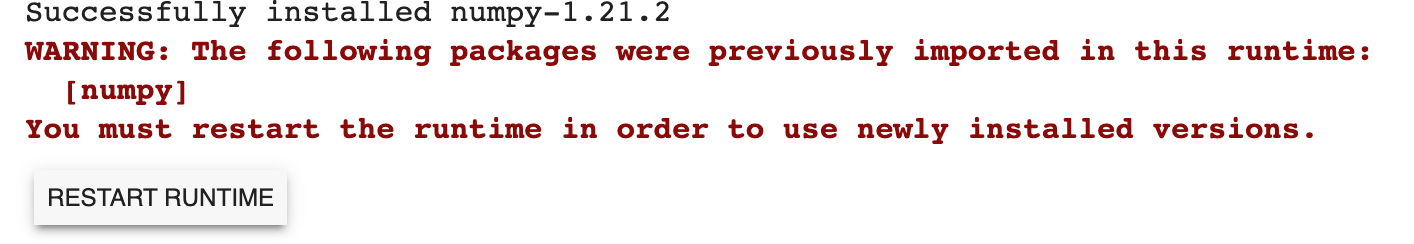

In [ ]:
# !!! DO NOT CHANGE THIS CODE !!!
# requirement
# If needed, you should restart runtime. Monitor your output in this cell.
# After restart runtime, please check wehter packages were installed correctly by running this cell again.
!pip install pyLDAvis
!pip install --upgrade "pandas<2.0.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 31.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.25.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.1 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 22.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.1
    Uninstalling pandas-2.2.1:
      Successfully uninstalled pandas-2.2.1
ERROR: p

## Preprocessing text data

In [ ]:
##### DO NOT CHANGE CODES IN THIS CELL #####
import os
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

import gzip
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# code for loading Amazon review data
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Using Google Drive

In [ ]:
##### DO NOT CHANGE CODES IN THIS CELL #####
# 1) Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let's use "reviews_Baby" dataset from Amazon reviews as we diid in our class.

In [ ]:
##### DO NOT CHANGE CODES IN THIS CELL #####
file_path = '/content/drive/MyDrive/reviews_Baby.json.gz'
if os.path.isfile(file_path):
  df_reviews = getDF(file_path) # Downloaded
else:
  !wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Baby.json.gz
  !cp  'reviews_Baby.json.gz' '/content/drive/MyDrive/reviews_Baby.json.gz'
  df_reviews = getDF('reviews_Baby.json.gz') # Downloaded

In [ ]:
##### DO NOT CHANGE CODES IN THIS CELL #####
df_reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A28O3NP6WR5517,0188399313,Jennifer gymer,"[0, 0]","They work very well. Easy to clean, we wash th...",5.0,These bottles are great!,1369612800,"05 27, 2013"
1,AX0M1Z6ZWO52J,0188399399,Ash M.,"[1, 1]",it came early and was not disappointed. i love...,5.0,perfect,1365465600,"04 9, 2013"
2,A1KD7N84L7NIUT,0188399518,Buffy Fan,"[0, 0]",I ended up with a variety of different brands ...,4.0,Good cotton wipes,1392336000,"02 14, 2014"
3,A29CUDEIF4X1UO,0188399518,J. D. Solbach,"[1, 1]","These flannel wipes are OK, but in my opinion ...",3.0,Sending them back.,1373241600,"07 8, 2013"
4,A32592TYN6C9EM,0316967297,Amazon Customer,"[0, 0]","Cute quilt, the colors are perfect and my litt...",4.0,Very cute,1378425600,"09 6, 2013"


In [ ]:
##### DO NOT CHANGE CODES IN THIS CELL #####
# check the number of records
# the reuslt should be "(915446, 9)"
print(df_reviews.shape)

(915446, 9)


### Pre-processing

First, let's clean texts.

Q1) Please add the column 'cleanedText' with removing special characters from 'reviewText' using regular expression

In [ ]:
# Complete the following code
df_reviews['cleanedText'] = df_reviews['reviewText'].str.replace("[^a-zA-Z]", " ")
df_reviews.head()

<ipython-input-8-66ade215ac60>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_reviews['cleanedText'] = df_reviews['reviewText'].str.replace("[^a-zA-Z]", " ")


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,cleanedText
0,A28O3NP6WR5517,0188399313,Jennifer gymer,"[0, 0]","They work very well. Easy to clean, we wash th...",5.0,These bottles are great!,1369612800,"05 27, 2013",They work very well Easy to clean we wash th...
1,AX0M1Z6ZWO52J,0188399399,Ash M.,"[1, 1]",it came early and was not disappointed. i love...,5.0,perfect,1365465600,"04 9, 2013",it came early and was not disappointed i love...
2,A1KD7N84L7NIUT,0188399518,Buffy Fan,"[0, 0]",I ended up with a variety of different brands ...,4.0,Good cotton wipes,1392336000,"02 14, 2014",I ended up with a variety of different brands ...
3,A29CUDEIF4X1UO,0188399518,J. D. Solbach,"[1, 1]","These flannel wipes are OK, but in my opinion ...",3.0,Sending them back.,1373241600,"07 8, 2013",These flannel wipes are OK but in my opinion ...
4,A32592TYN6C9EM,0316967297,Amazon Customer,"[0, 0]","Cute quilt, the colors are perfect and my litt...",4.0,Very cute,1378425600,"09 6, 2013",Cute quilt the colors are perfect and my litt...


Q2) Please update 'cleanedText' by removing words which has less than 3 letters

In [ ]:
# Complete the following code
df_reviews['cleanedText'] = df_reviews['cleanedText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
df_reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,cleanedText
0,A28O3NP6WR5517,0188399313,Jennifer gymer,"[0, 0]","They work very well. Easy to clean, we wash th...",5.0,These bottles are great!,1369612800,"05 27, 2013",They work very well Easy clean wash them the d...
1,AX0M1Z6ZWO52J,0188399399,Ash M.,"[1, 1]",it came early and was not disappointed. i love...,5.0,perfect,1365465600,"04 9, 2013",came early and was not disappointed love plane...
2,A1KD7N84L7NIUT,0188399518,Buffy Fan,"[0, 0]",I ended up with a variety of different brands ...,4.0,Good cotton wipes,1392336000,"02 14, 2014",ended with variety different brands cotton fla...
3,A29CUDEIF4X1UO,0188399518,J. D. Solbach,"[1, 1]","These flannel wipes are OK, but in my opinion ...",3.0,Sending them back.,1373241600,"07 8, 2013",These flannel wipes are but opinion not worth ...
4,A32592TYN6C9EM,0316967297,Amazon Customer,"[0, 0]","Cute quilt, the colors are perfect and my litt...",4.0,Very cute,1378425600,"09 6, 2013",Cute quilt the colors are perfect and little g...


Q3) Please update 'cleanedText' by lowercasing texts

In [ ]:
# Complete the following code
df_reviews['cleanedText'] = df_reviews['cleanedText'].apply(lambda x: x.lower())
df_reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,cleanedText
0,A28O3NP6WR5517,0188399313,Jennifer gymer,"[0, 0]","They work very well. Easy to clean, we wash th...",5.0,These bottles are great!,1369612800,"05 27, 2013",they work very well easy clean wash them the d...
1,AX0M1Z6ZWO52J,0188399399,Ash M.,"[1, 1]",it came early and was not disappointed. i love...,5.0,perfect,1365465600,"04 9, 2013",came early and was not disappointed love plane...
2,A1KD7N84L7NIUT,0188399518,Buffy Fan,"[0, 0]",I ended up with a variety of different brands ...,4.0,Good cotton wipes,1392336000,"02 14, 2014",ended with variety different brands cotton fla...
3,A29CUDEIF4X1UO,0188399518,J. D. Solbach,"[1, 1]","These flannel wipes are OK, but in my opinion ...",3.0,Sending them back.,1373241600,"07 8, 2013",these flannel wipes are but opinion not worth ...
4,A32592TYN6C9EM,0316967297,Amazon Customer,"[0, 0]","Cute quilt, the colors are perfect and my litt...",4.0,Very cute,1378425600,"09 6, 2013",cute quilt the colors are perfect and little g...


Now we will remove stopwords from texts and tokenize the text into words. (up to 5,000 reviews)

In [ ]:
# DO NOT CHANGE THIS CODE
# removing stopwords // this may take long time....
list_stopwords = stopwords.words('english')
tokenized_reviews = df_reviews['cleanedText'][:5000].apply(lambda x: x.split())
tokenized_reviews = tokenized_reviews.apply(lambda x: [item for item in x if item not in list_stopwords])
tokenized_reviews[:10]

0    [work, well, easy, clean, wash, dishwasher, ev...
1    [came, early, disappointed, love, planet, wise...
2    [ended, variety, different, brands, cotton, fl...
3    [flannel, wipes, opinion, worth, keeping, also...
4    [cute, quilt, colors, perfect, little, girl, l...
5    [soft, comfortable, warmer, looks, fit, full, ...
6    [children, give, pacifier, easily, fact, downr...
7    [product, well, worth, purchase, found, anythi...
8    [book, amazing, bought, read, daughter, month,...
9    [bought, high, hopes, actually, working, get, ...
Name: cleanedText, dtype: object

### Latent Dirichlet Allocation

In [ ]:
##### DO NOT CHANGE CODES IN THIS CELL #####
# Even if there are error messages for restart session, please ignore.
!pip install pyLDAvis
!pip install pandas==1.5.1

  Using cached pandas-2.2.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.25.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.1 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 21.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.1
    Uninstalling pandas-2.2.1:
      Successfully uninstalled pandas-2.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following d

In [ ]:
# DO NOT CHANGE THIS CODE
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this

Q4) Create dictionary from [tokenized_reviews]

In [ ]:
dictionary = corpora.Dictionary(tokenized_reviews[:5000])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q5) Create word-document frequency data from [tokenized_reviews].

In [ ]:
corpus = [dictionary.doc2bow(text) for text in tokenized_reviews[:5000]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# DO NOT CHANGE THIS CODE
print(tokenized_reviews[0])
print(corpus[0])
# The expected result is
# ['work', 'well', 'easy', 'clean', 'wash', 'dishwasher', 'every', 'day', 'loves', 'hold', 'bottle', 'plastic', 'covering', 'makes', 'easy', 'hold']
# [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]

['work', 'well', 'easy', 'clean', 'wash', 'dishwasher', 'every', 'day', 'loves', 'hold', 'bottle', 'plastic', 'covering', 'makes', 'easy', 'hold']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


For the details of LDA model of gensim package, please see the link below:  
https://radimrehurek.com/gensim/models/ldamodel.html



In [ ]:
 # DO NOT CHANGE THIS CODE
 lda_model = gensim.models.ldamodel.LdaModel(
  corpus=corpus,
  id2word=dictionary,
  num_topics=10,
  random_state=100,
  per_word_topics=True
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# DO NOT CHANGE THIS CODE
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.116726  0.014458       1        1  32.180773
2      0.039823 -0.008428       2        1  15.174882
1      0.064659  0.002159       3        1  10.686168
7      0.060664  0.044206       4        1   8.920119
9      0.015896 -0.009093       5        1   8.829943
4     -0.027856 -0.052193       6        1   8.714754
6     -0.076254 -0.102839       7        1   5.519581
8     -0.067435 -0.033823       8        1   4.863329
5      0.005673  0.026114       9        1   4.406248
3     -0.131897  0.119439      10        1   0.704202, topic_info=         Term         Freq        Total Category  logprob  loglift
1954      tub  4289.000000  4289.000000  Default  30.0000  30.0000
6050  cabinet   471.000000   471.000000  Default  29.0000  29.0000
802     water   996.000000   996.000000  Default  28.0000  28.0000
6735     sink   439.000000   439.000000  Default  27.0000  27.0000
33       baby  2129.000000  2129.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
52      first     4.374002  1118.572529  Topic10  -5.8653  -0.5883
97     months     4.254424   999.591269  Topic10  -5.8930  -0.5035
240     great     4.208902  1482.706371  Topic10  -5.9038  -0.9086
59       like     3.882510  1195.527186  Topic10  -5.9845  -0.7740
2546    sling     3.808316   466.010742  Topic10  -6.0038   0.1488

[782 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
5889      3  0.776770  absolutly
5889      6  0.129462  absolutly
1241      2  0.694180   accurate
1241      6  0.034709   accurate
1241      9  0.034709   accurate
...     ...       ...        ...
407       5  0.166647      years
407       6  0.074991      years
407       7  0.061104      years
407       8  0.077769      years
407       9  0.091656      years

[2120 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 8, 10, 5, 7, 9, 6, 4])

The result in the previous code shows some issues as we studied in our class.   
Let's use POS-tagging for the better result.   
Also, let's keep only nouns, adverbs, adjectives, and verbs using POS tags in NLTK pacakge.  
Q6) Keep only nouns, adverbs, adjectives, and verbs.   
(hint: You can use the POS tags of
* nouns: 'NN', 'NNS',
* adverbs: 'RB', 'RBR', 'RBS',
* adjectives: 'JJ', 'JJR', 'JJS',
* verbs: 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'    

)

In [ ]:
# Please fill the code to work
tokenized_reviews_pos = []
for sent in tokenized_reviews:
  sent_pos = []
  postag = nltk.pos_tag(sent)
  for i in postag:
    if i[1] in ['NN', 'NNS', 'RB', 'RBR', 'RBS', 'JJ', 'JJR', 'JJS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']:
      if len(i[0]) > 1:
        sent_pos.append(i[0])
        continue
  tokenized_reviews_pos.append(sent_pos)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# DO NOT CHANGE THIS CODE
print(tokenized_reviews_pos[0])
# the expected output is
# [['work', 'well', 'easy', 'clean', 'wash', 'dishwasher', 'day', 'loves', 'hold', 'bottle', 'plastic', 'covering', 'makes', 'easy', 'hold']]

['work', 'well', 'easy', 'clean', 'wash', 'dishwasher', 'day', 'loves', 'hold', 'bottle', 'plastic', 'covering', 'makes', 'easy', 'hold']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q7) Create dictionary from [tokenized_reviews_pos].

In [ ]:
dictionary_pos = corpora.Dictionary(tokenized_reviews_pos)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q8) Create word-document frequency data from [tokenized_reviews_pos].

In [ ]:
corpus_pos = [dictionary_pos.doc2bow(text) for text in tokenized_reviews_pos]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(tokenized_reviews_pos[0])
print(corpus_pos[0])
# The expected output is
# ['work', 'well', 'easy', 'clean', 'wash', 'dishwasher', 'day', 'loves', 'hold', 'bottle', 'plastic', 'covering', 'makes', 'easy', 'hold']
# [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]

['work', 'well', 'easy', 'clean', 'wash', 'dishwasher', 'day', 'loves', 'hold', 'bottle', 'plastic', 'covering', 'makes', 'easy', 'hold']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
 # DO NOT CHANGE THIS CODE
 lda_model_pos = gensim.models.ldamodel.LdaModel(
  corpus=corpus_pos,
  id2word=dictionary_pos,
  num_topics=10,
  random_state=100,
  per_word_topics=True
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# DO NOT CHANGE THIS CODE
# Visualize the topics
pyLDAvis.enable_notebook()
vis_pos = pyLDAvis.gensim_models.prepare(lda_model_pos, corpus_pos, dictionary_pos)
vis_pos

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.126549 -0.012434       1        1  34.515384
3      0.117479 -0.023831       2        1  13.745592
7     -0.000011  0.009745       3        1  12.510796
4     -0.014709  0.020956       4        1   9.905996
0     -0.021317 -0.006214       5        1   7.171338
2     -0.083804 -0.064725       6        1   5.950673
5     -0.069737  0.012812       7        1   4.468407
9     -0.001114  0.107042       8        1   4.077618
1     -0.016966 -0.074169       9        1   4.028328
6     -0.036369  0.030818      10        1   3.625868, topic_info=         Term         Freq        Total Category  logprob  loglift
1904      tub  3422.000000  3422.000000  Default  30.0000  30.0000
5986  cabinet   341.000000   341.000000  Default  29.0000  29.0000
32       baby  2192.000000  2192.000000  Default  28.0000  28.0000
6668     sink   526.000000   526.000000  Default  27.0000  27.0000
370    diaper  2573.000000  2573.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
114    little    34.283142  1015.151721  Topic10  -5.3791  -0.0711
196       use    37.241015  2321.068816  Topic10  -5.2963  -0.8153
258      used    32.541837  1006.735711  Topic10  -5.4312  -0.1149
76        way    31.618168   608.141380  Topic10  -5.4600   0.3604
210       old    31.685956  1223.323462  Topic10  -5.4578  -0.3364

[784 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
353       1  0.247862   able
353       2  0.111840   able
353       3  0.129976   able
353       4  0.105795   able
353       5  0.045341   able
...     ...       ...    ...
390       6  0.134402  years
390       7  0.025200  years
390       8  0.044801  years
390       9  0.106402  years
390      10  0.011200  years

[2280 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 4, 8, 5, 1, 3, 6, 10, 2, 7])

LDA with POS-tag filtering + stemming

Q9) Please apply Snowball Stemmer from NLTK package to [tokenized_reviews_pos].  
Also, keep the words at least 3 letters after stemming.

In [ ]:
# Complete the following code
STEMMER = SnowballStemmer("english")
tokenized_reviews_pos_stem = [] # a list for the new data
for sent in tokenized_reviews_pos:
  sent_snow = []
  for word in sent:
    stemmed = STEMMER.stem(word)
    if len(stemmed)>2:
      sent_snow.append(stemmed)
  tokenized_reviews_pos_stem.append(sent_snow)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(tokenized_reviews_pos_stem[0])
# the expected output is
# [['work', 'well', 'easi', 'clean', 'wash', 'dishwash', 'day', 'love', 'hold', 'bottl', 'plastic', 'cover', 'make', 'easi', 'hold']]

['work', 'well', 'easi', 'clean', 'wash', 'dishwash', 'day', 'love', 'hold', 'bottl', 'plastic', 'cover', 'make', 'easi', 'hold']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q10) Create dictionary from [tokeniized reviews_pos_stem].


In [ ]:
dictionary_pos_stem = corpora.Dictionary(tokenized_reviews_pos_stem)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q11) Create corpus data from [tokeniized_reviews_pos_stem].

In [ ]:
corpus_pos_stem = [dictionary_pos_stem.doc2bow(text) for text in tokenized_reviews_pos_stem]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# DO NOT CHANGE THIS CODE
print(tokenized_reviews_pos_stem[0])
print(corpus_pos_stem[0])
# The expected result are
# ['work', 'well', 'easi', 'clean', 'wash', 'dishwash', 'day', 'love', 'hold', 'bottl', 'plastic', 'cover', 'make', 'easi', 'hold']
# [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]

['work', 'well', 'easi', 'clean', 'wash', 'dishwash', 'day', 'love', 'hold', 'bottl', 'plastic', 'cover', 'make', 'easi', 'hold']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
 # DO NOT CHANGE THIS CODE
 lda_model_pos_stem = gensim.models.ldamodel.LdaModel(
  corpus=corpus_pos_stem,
  id2word=dictionary_pos_stem,
  num_topics=10,
  random_state=100,
  per_word_topics=True
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# DO NOT CHANGE THIS CODE
# Visualize the topics
pyLDAvis.enable_notebook()
vis_pos_stem = pyLDAvis.gensim_models.prepare(lda_model_pos_stem, corpus_pos_stem, dictionary_pos_stem)
vis_pos_stem

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.118519 -0.005383       1        1  40.194333
1     -0.002852  0.007034       2        1  11.907805
4      0.035859  0.053487       3        1  11.008107
5      0.011916 -0.007464       4        1   9.793682
2      0.026553 -0.046715       5        1   9.583883
0      0.106633 -0.005113       6        1   6.593719
6     -0.080599 -0.004788       7        1   3.361019
8     -0.052081 -0.010524       8        1   3.298454
7     -0.087465 -0.106474       9        1   3.020933
9     -0.076482  0.125941      10        1   1.238064, topic_info=        Term         Freq        Total Category  logprob  loglift
1443     tub  2071.000000  2071.000000  Default  30.0000  30.0000
42    diaper  4070.000000  4070.000000  Default  29.0000  29.0000
648     bath   708.000000   708.000000  Default  28.0000  28.0000
404    sheet   851.000000   851.000000  Default  27.0000  27.0000
2      cover   662.000000   662.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
85      keep    12.571809  1033.998020  Topic10  -5.3054  -0.0181
163     even    12.072280   946.516629  Topic10  -5.3460   0.0297
632    water    11.817715   812.830604  Topic10  -5.3673   0.1607
74      also    11.952031  1072.080742  Topic10  -5.3560  -0.1048
400    place    10.648921   569.151562  Topic10  -5.4714   0.4129

[758 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
3140      9  0.497936    accent
2547      3  0.076057     accid
2547      5  0.912681     accid
2547      8  0.009507     accid
1674      1  0.208712  accident
...     ...       ...       ...
204       6  0.044895      year
204       7  0.082987      year
204       8  0.028569      year
204       9  0.020407      year
204      10  0.010884      year

[2359 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 5, 6, 3, 1, 7, 9, 8, 10])

In the result from the previous code, please change relevance metric (λ).   
Then, please look at each topic and its words.
  
Now, let's find the optimal number of topics using perplexity.

Q12) Calculate perplexity score of even number of topics (e.g., 2, 4, 6, 8, ..).

In [ ]:
list_perplexity = []
for ntopic in range(2,50,2):
  lda_model = gensim.models.ldamodel.LdaModel(
      corpus=corpus_pos_stem,
      id2word=dictionary_pos_stem,
      num_topics=ntopic,
      random_state=100,
      per_word_topics=True
  )
  # Compute Perplexity
  nPerplexity = lda_model.log_perplexity(corpus_pos_stem)
  list_perplexity.append(nPerplexity)
  print('Perplexity of ', str(ntopic), ' topics: ', nPerplexity)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Perplexity of  2  topics:  -6.845242502371561


Perplexity of  4  topics:  -6.884333598448262


Perplexity of  6  topics:  -6.904313450484846


Perplexity of  8  topics:  -6.9672528430808995


Perplexity of  10  topics:  -7.071273398644948


Perplexity of  12  topics:  -7.190710802164899


Perplexity of  14  topics:  -7.283268732335919


Perplexity of  16  topics:  -7.365458971931633


Perplexity of  18  topics:  -7.4426979018101855


Perplexity of  20  topics:  -7.5169048183149325


Perplexity of  22  topics:  -7.562499650397182


Perplexity of  24  topics:  -7.644452453456119


Perplexity of  26  topics:  -7.67880357546233


Perplexity of  28  topics:  -7.761141535862874


Perplexity of  30  topics:  -7.837387996409734


Perplexity of  32  topics:  -7.895148436024966


Perplexity of  34  topics:  -7.947805677332469


Perplexity of  36  topics:  -8.018905080409677


Perplexity of  38  topics:  -8.08021343818228


Perplexity of  40  topics:  -8.124058744987314


Perplexity of  42  topics:  -8.205874463609407


Perplexity of  44  topics:  -8.264298729345988


Perplexity of  46  topics:  -8.351847353843892
Perplexity of  48  topics:  -8.391523370328914


Let's create a plot of perplexity by the number of topics.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Perplexity


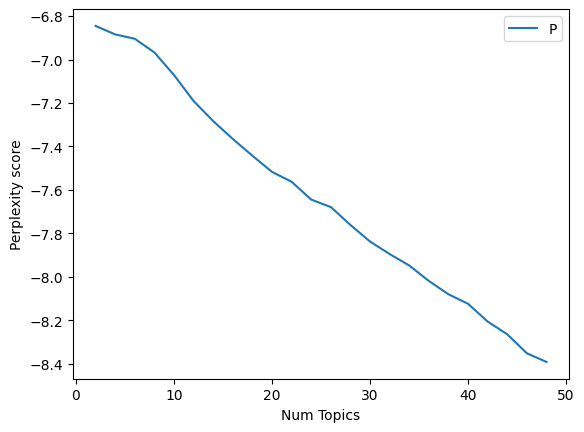

In [ ]:
# Show graph
x = range(2,50,2)
print("Perplexity")
plt.plot(x, list_perplexity)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity score")
plt.legend(("Perplexity values"), loc='best')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Perplexity


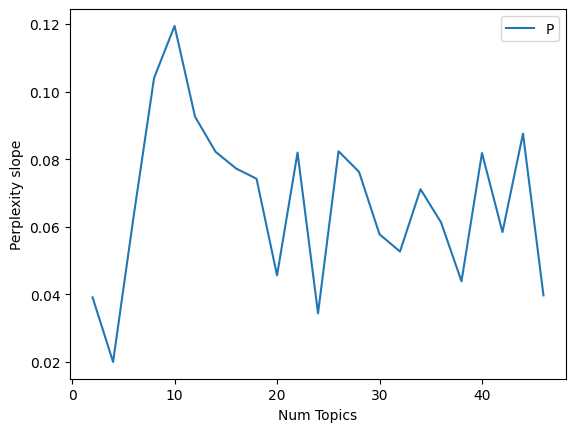

In [ ]:
list_perplexity_slope = []
for idx in range(len(list_perplexity)-1):
  list_perplexity_slope.append(list_perplexity[idx]-list_perplexity[idx+1])
# Show graph
x = range(2,50,2)[:len(list_perplexity_slope)]
print("Perplexity")
plt.plot(x, list_perplexity_slope)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity slope")
plt.legend(("Perplexity_values"), loc='best')
plt.show()

Q13) Use the optimal number of topics using perplexity.

In [ ]:
lda_model_optimal = gensim.models.ldamodel.LdaModel(
    corpus=corpus_pos_stem,
    id2word=dictionary_pos_stem,
    num_topics=range(2,50,3)[list_perplexity_slope.index(max(list_perplexity_slope))],
    random_state=100,
    per_word_topics=True
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_optimal, corpus_pos_stem, dictionary_pos_stem)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.136702 -0.057114       1        1  38.214212
1     -0.001575  0.043241       2        1   9.187111
13     0.008291  0.086116       3        1   8.771569
4      0.084062  0.103871       4        1   8.177999
5      0.040665  0.011018       5        1   7.006233
0      0.095623 -0.052435       6        1   6.272303
2     -0.001821 -0.027689       7        1   6.018110
11     0.061750 -0.027081       8        1   5.443014
10    -0.085544 -0.071426       9        1   2.407062
6     -0.057297  0.025352      10        1   2.170796
7     -0.076364 -0.046642      11        1   1.906767
8     -0.055281 -0.038630      12        1   1.752716
12    -0.051322 -0.015104      13        1   1.689849
9     -0.097890  0.066524      14        1   0.982260, topic_info=        Term         Freq        Total Category  logprob  loglift
1443     tub  2182.000000  2182.000000  Default  30.0000  30.0000
404    sheet   800.000000   800.000000  Default  29.0000  29.0000
42    diaper  4324.000000  4324.000000  Default  28.0000  28.0000
20      leak   908.000000   908.000000  Default  27.0000  27.0000
184      use  4321.000000  4321.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
184      use    17.021396  4321.663080  Topic14  -4.7710  -0.9139
334    still    12.571694   841.499343  Topic14  -5.0740   0.4193
214    great    12.838808  1483.702169  Topic14  -5.0530  -0.1268
30      babi    13.169472  2420.367968  Topic14  -5.0275  -0.5907
80       get    11.166132  2238.069812  Topic14  -5.1926  -0.6774

[1009 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
3140     11  0.514036   accent
2547      4  0.068798    accid
2547      7  0.914030    accid
2547     11  0.009828    accid
4420      6  0.806731  accumul
...     ...       ...      ...
204      12  0.008149     year
204      13  0.019015     year
204      14  0.010866     year
3451      9  0.799164     yike
1851      7  0.672499   youtub

[3370 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 14, 5, 6, 1, 3, 12, 11, 7, 8, 9, 13, 10])

Q14) Please compare the result with previous results such as no stemming, no POS tagging filtering.

Type your answer:


**No Stemming**: Our first topic contains 32.2% of the tokens. This method appears to create a distance map with a lot of overlap between topics. Since these topics aren't that distinct and well defined we can infer that the perplexity would be rather high.

**POS Tagging**:Our first topic contains 34.5% of the tokens. This method has slightly less overlap than the first method but still has quite a few topics that share terms.

**Stemming**: Our first topic contains 38.2% of the tokens. This method produces a lot of topics that don't overlap, meaning they are very distinct. This implies that we have very low perplexity.